<a id="1"></a>
<div class="list-group" id="1" role="tablist">
    
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Importing Libraries</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [2]:
#load the dataset
df=pd.read_csv("corona_tested_individuals_ver_006.english.csv")
df.head()

C:\Users\Asif_Pervez_Polok\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Meta information 
    about Dataframe</p>

In [3]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 278848 and number of columns:--> 10


In [4]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


 <a id="3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🛒Missing values </p>

In [5]:
#check for missing values 
def checking_m(df):
    null_v = df.isin(["None"]).sum().sort_values(ascending=False)
    null_percent = (df.isin(["None"]).sum()/df.isin(["None"]).count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
age_60_and_above,127320,0.456593
gender,19563,0.070157
cough,252,0.000904
fever,252,0.000904
sore_throat,1,0.000004
shortness_of_breath,1,0.000004
head_ache,1,0.000004
test_date,0,0.000000
corona_result,0,0.000000
test_indication,0,0.000000


In [6]:
# drop the missing values
df = df[df.cough != "None"]
df = df[df.fever != "None"]
df = df[df.sore_throat != "None"]
df = df[df.shortness_of_breath != "None"]
df = df[df.head_ache != "None"]
df = df[df.age_60_and_above != "None"]
df = df[df.gender != "None"]
df = df[df.corona_result!= "other"]

In [7]:
#Afetr removing.
def checking_m(df):
    null_v = df.isin(["None"]).sum().sort_values(ascending=False)
    null_percent = (df.isin(["None"]).sum()/df.isin(["None"]).count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
test_date,0,0.0
cough,0,0.0
fever,0,0.0
sore_throat,0,0.0
shortness_of_breath,0,0.0
head_ache,0,0.0
corona_result,0,0.0
age_60_and_above,0,0.0
gender,0,0.0
test_indication,0,0.0


<a id="3.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🤼‍♀️Duplicated rows </p>

In [8]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 132116


In [9]:
#dropping the duplicated rows 
#df=df.drop_duplicates(keep="first")
#print("After removing,now number of duplicated rows are:",df.duplicated().sum())

<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Label Encoding </p>

In [10]:
df["corona_result"].replace("negative", 0, inplace=True)
df["corona_result"].replace("positive", 1, inplace=True)

df["gender"].replace("female", 0, inplace=True)
df["gender"].replace("male", 1, inplace=True)

df["test_indication"].replace("Contact with confirmed", 1, inplace=True)
df["test_indication"].replace("Abroad", 2, inplace=True)
df["test_indication"].replace("Other", 0, inplace=True)

df["age_60_and_above"].replace("Yes", 1, inplace=True)
df["age_60_and_above"].replace("No", 0, inplace=True)

<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Statistical information of Dataframe </p>

In [11]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136294 entries, 122808 to 265120
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            136294 non-null  object
 1   cough                136294 non-null  object
 2   fever                136294 non-null  object
 3   sore_throat          136294 non-null  object
 4   shortness_of_breath  136294 non-null  object
 5   head_ache            136294 non-null  object
 6   corona_result        136294 non-null  int64 
 7   age_60_and_above     136294 non-null  int64 
 8   gender               136294 non-null  int64 
 9   test_indication      136294 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 11.4+ MB


In [12]:
df.drop(columns=["test_date"], inplace=True)

In [13]:
df["cough"] = df["cough"].astype('int')
df["fever"] = df["fever"].astype('int')
df["sore_throat"] = df["sore_throat"].astype('int')
df["shortness_of_breath"] = df["shortness_of_breath"].astype('int')
df["head_ache"] = df["head_ache"].astype('int')

In [14]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,1,0,0,0,0,0,1,1,0
122809,1,0,0,0,0,1,0,0,0
122810,0,0,0,0,0,0,0,0,0
122811,0,1,0,0,0,0,0,0,2
122812,1,0,0,0,0,0,1,0,0


In [15]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
cough,136294.000000,0.182334,0.386121,0.000000,0.000000,0.000000,0.000000,1.000000
fever,136294.000000,0.092895,0.290286,0.000000,0.000000,0.000000,0.000000,1.000000
sore_throat,136294.000000,0.010808,0.103396,0.000000,0.000000,0.000000,0.000000,1.000000
shortness_of_breath,136294.000000,0.007785,0.087887,0.000000,0.000000,0.000000,0.000000,1.000000
head_ache,136294.000000,0.015224,0.122445,0.000000,0.000000,0.000000,0.000000,1.000000
corona_result,136294.000000,0.077964,0.268116,0.000000,0.000000,0.000000,0.000000,1.000000
age_60_and_above,136294.000000,0.173896,0.379022,0.000000,0.000000,0.000000,0.000000,1.000000
gender,136294.000000,0.507381,0.499947,0.000000,0.000000,1.000000,1.000000,1.000000
test_indication,136294.000000,0.267583,0.639734,0.000000,0.000000,0.000000,0.000000,2.000000


In [16]:
#check the correlation between terget and each of columns
df.corr()["corona_result"]

cough                  0.222507
fever                  0.326357
sore_throat            0.328494
shortness_of_breath    0.277832
head_ache              0.409489
corona_result          1.000000
age_60_and_above       0.014814
gender                 0.034023
test_indication        0.214809
Name: corona_result, dtype: float64

<AxesSubplot:>

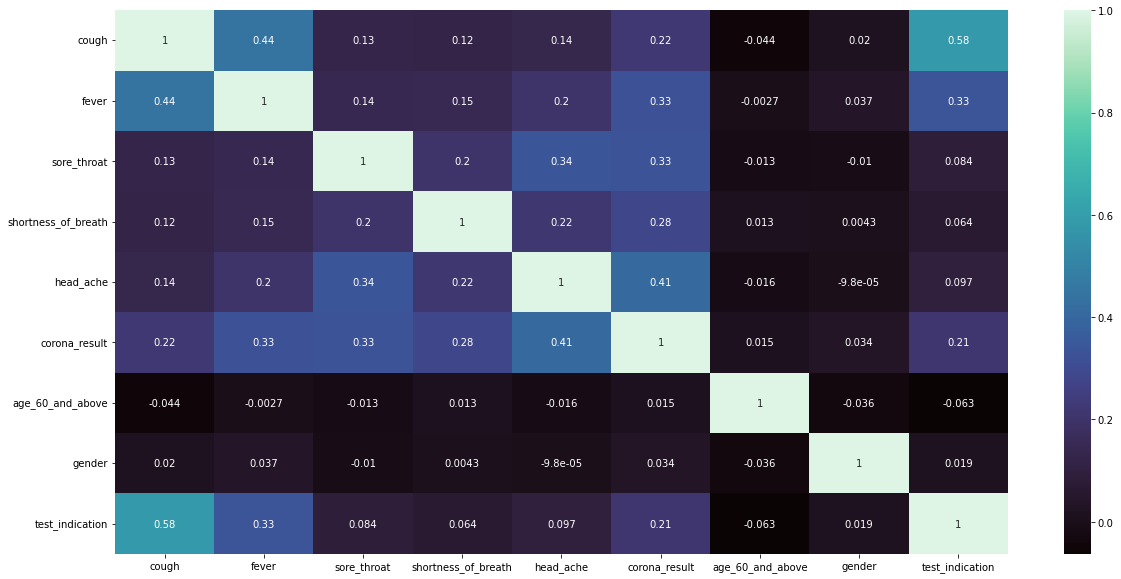

In [17]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="mako",linecolor='black')

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 EDA & Visualization</p>

### Target EDA

In [18]:
# targrt col
pd.DataFrame(df['corona_result'].value_counts()).rename({"corona_result":"Counts"}, axis = 1).rename_axis("corona_result")

,Counts
corona_result,
0,125668
1,10626


<AxesSubplot:ylabel='corona_result'>

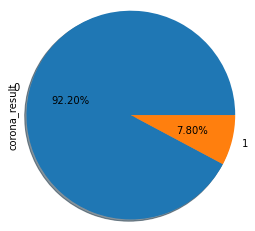

In [19]:
df['corona_result'].value_counts().plot(kind="pie",autopct="%.2f%%",shadow=True, radius = 1.2)

Text(0, 0.5, 'count')

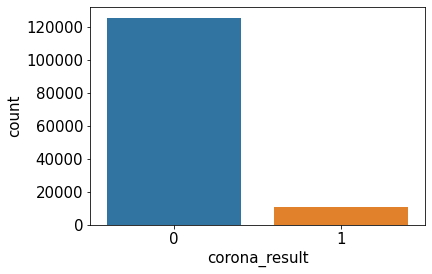

In [20]:
sns.countplot(df["corona_result"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("corona_result",fontsize=15)
plt.ylabel("count",fontsize=15)

### Features EDA

In [21]:
cat_col = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
        'age_60_and_above', 'gender', 'test_indication']

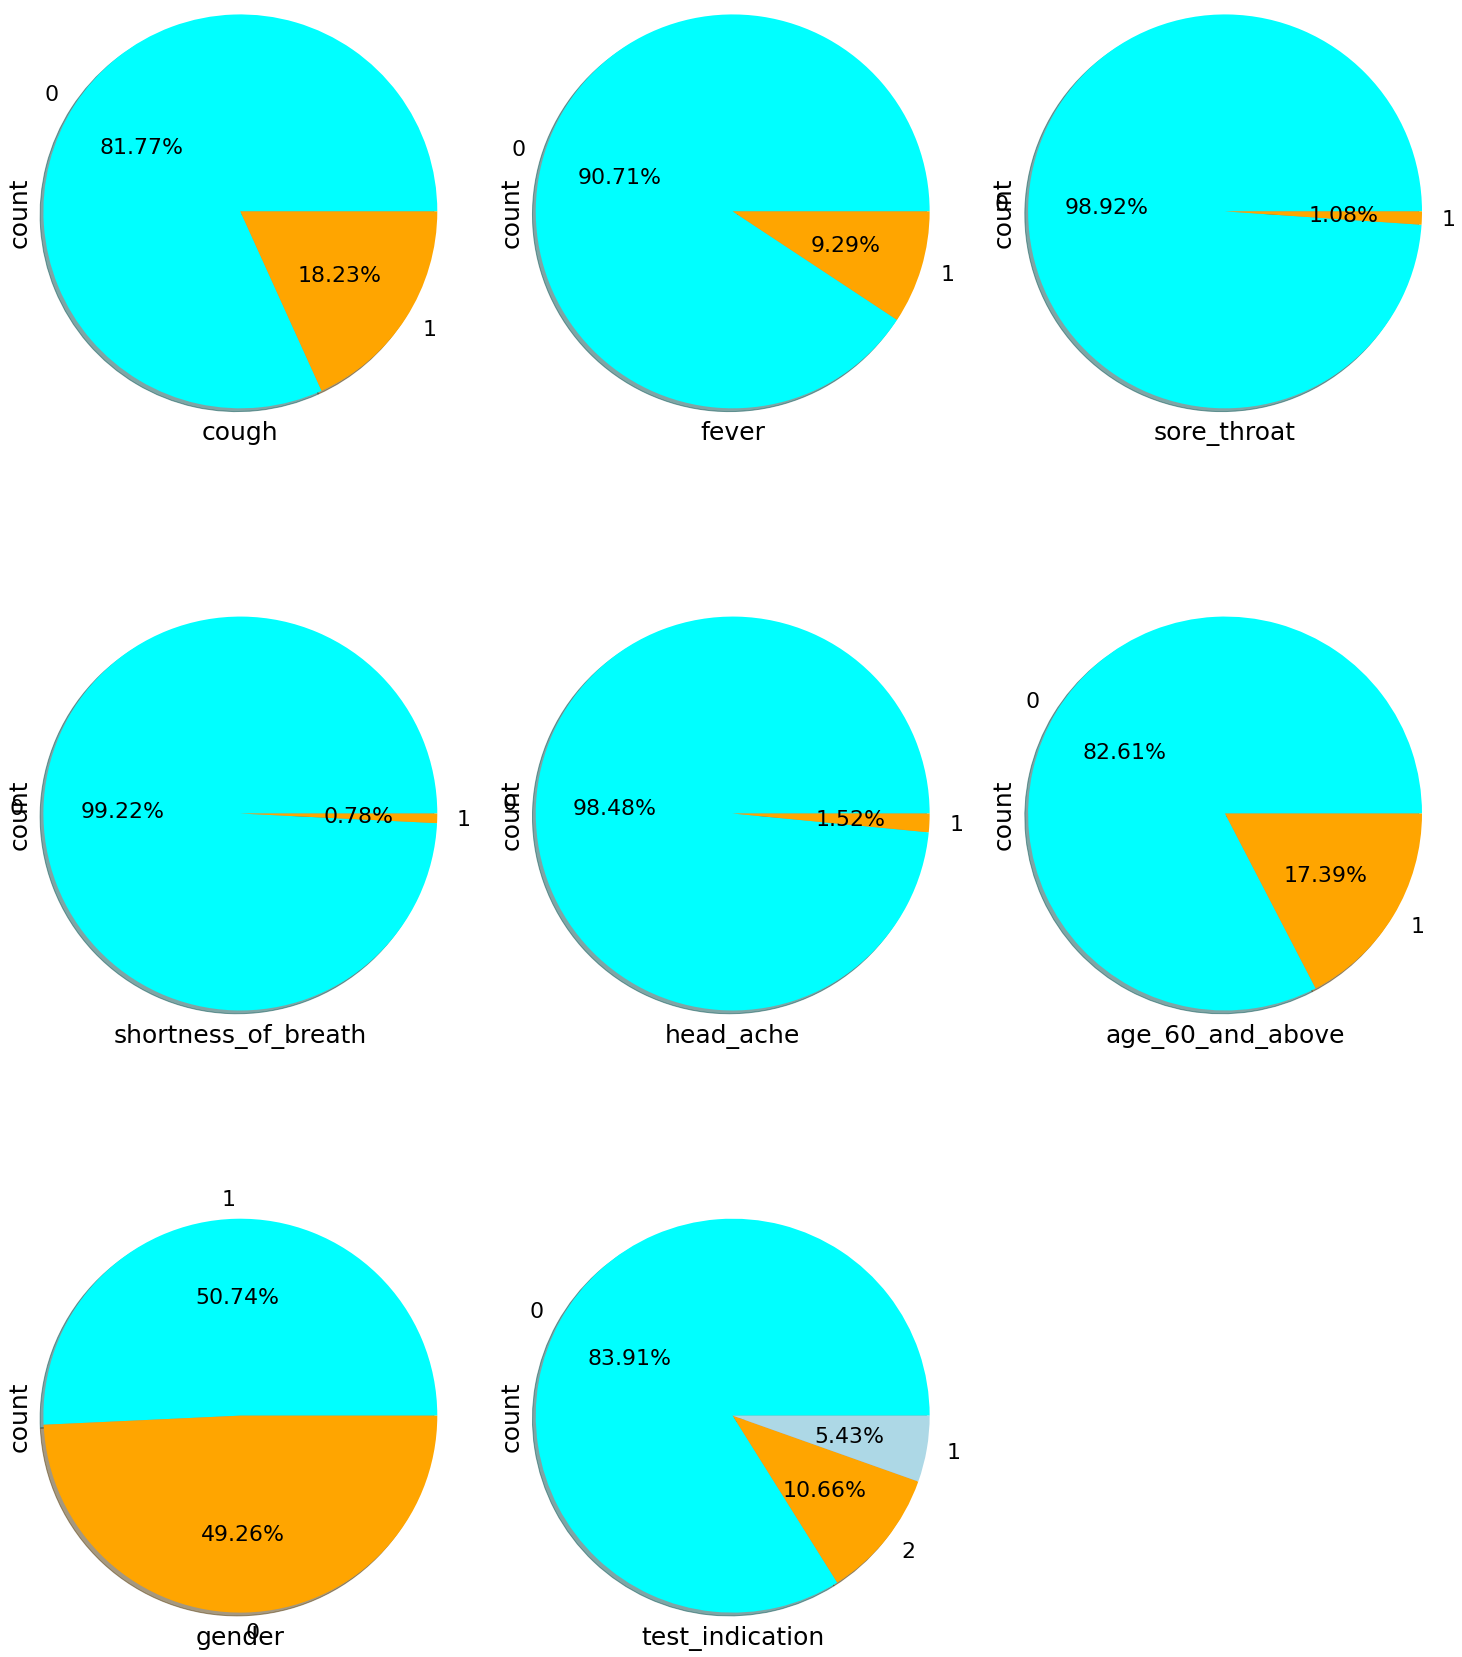

In [22]:

i=1 
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,120))
for col in cat_col:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.2)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1

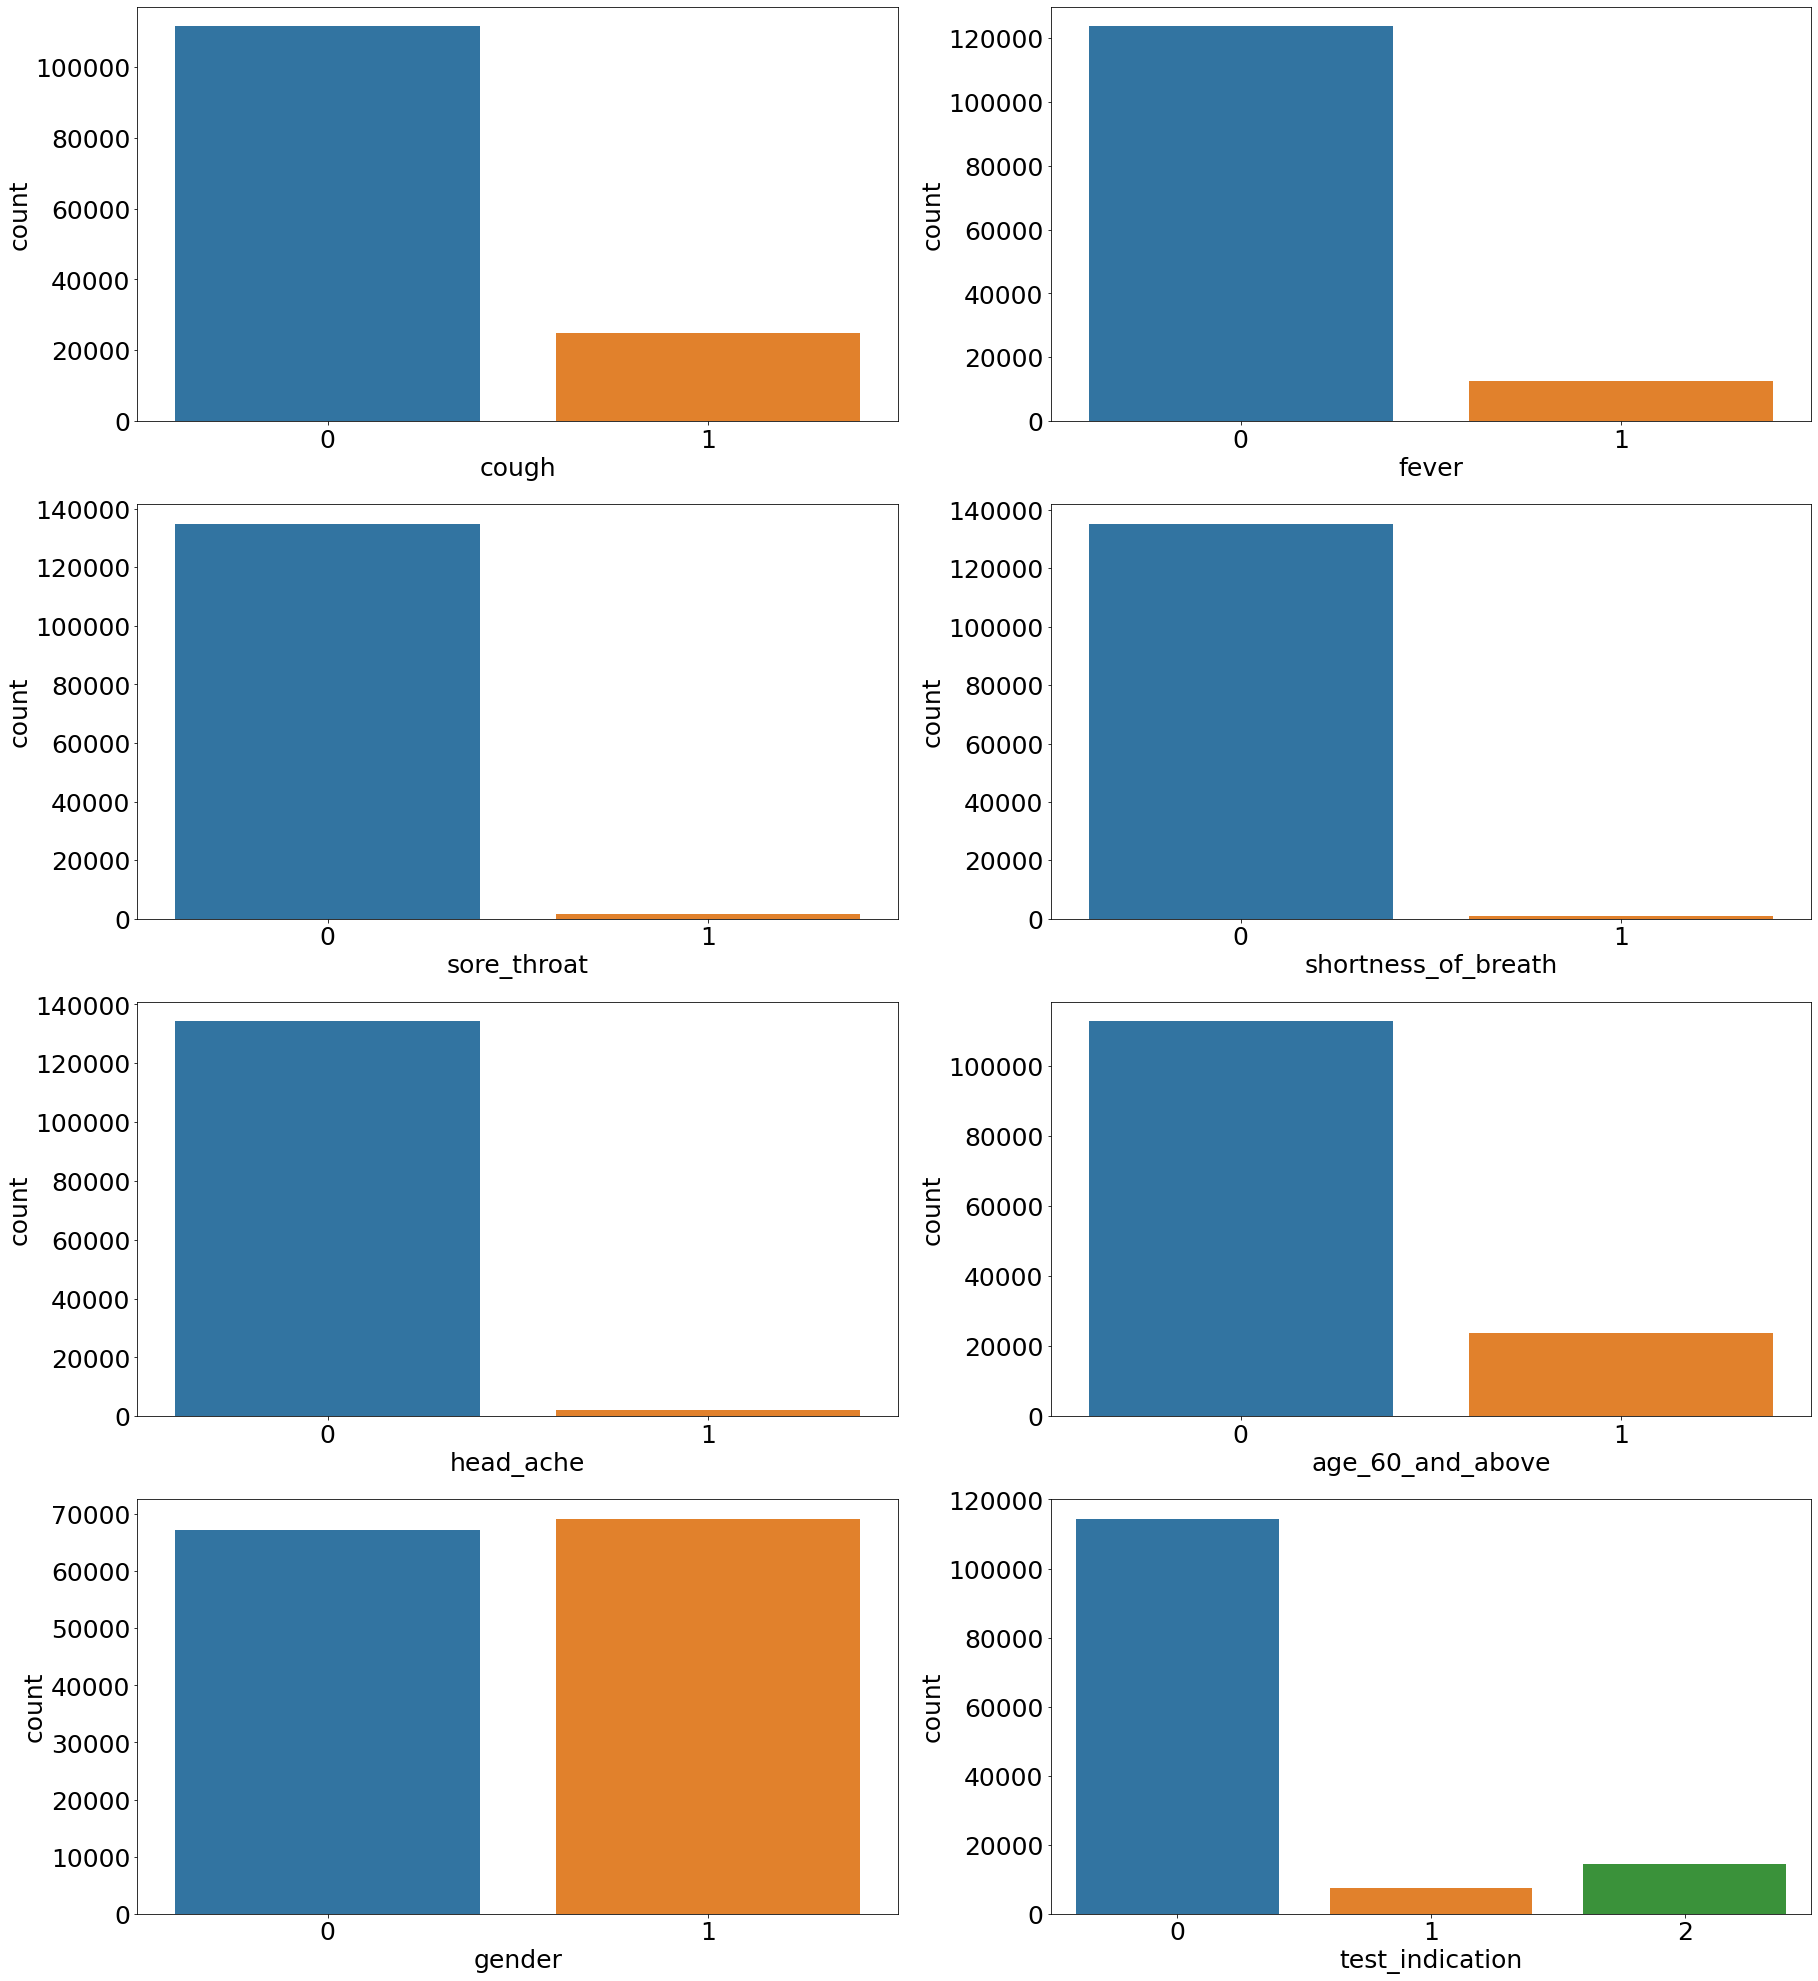

In [23]:
i=1
plt.figure(figsize=(30,90))
for col in cat_col:
    plt.subplot(10,2,i)
    sns.countplot(df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Split data</p>

In [24]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [25]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication']]
y=df.corona_result

In [26]:
#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (109035, 8)
X_test shape:  (27259, 8)

Y_train shape:  (109035,)
Y_test shape:  (27259,)


In [27]:
y_train.value_counts()

0    100573
1      8462
Name: corona_result, dtype: int64

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Sampling the data</p>

In [28]:
from imblearn.under_sampling import RandomUnderSampler
resample = RandomUnderSampler()
x_train, y_train = resample.fit_resample(x_train, y_train)

In [29]:
x_test

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
202395,1,0,0,0,0,0,1,0
126404,1,0,0,0,0,0,0,0
182512,0,0,0,0,0,1,0,0
253837,0,0,0,0,0,0,1,0
166129,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
242269,1,0,0,0,0,0,0,0
225032,0,0,0,0,0,1,0,0
253607,0,0,0,0,0,0,0,0
165487,1,0,0,0,0,0,0,1


In [30]:
y_train.value_counts()

0    8462
1    8462
Name: corona_result, dtype: int64

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Applying PCA</p>

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_train_new=pca.fit_transform(x_train)
x_test_new=pca.transform(x_test)

In [32]:
import pickle

pickle.dump(pca,open('pca.pkl','wb'))

In [33]:
pca.explained_variance_ratio_

array([0.37712124, 0.1733372 ])

In [34]:
x_train_new.shape

(16924, 2)

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍Model building</p>

### Random forest

Accuracy :--->> 0.8981620749110386

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     25095
           1       0.43      0.82      0.56      2164

    accuracy                           0.90     27259
   macro avg       0.70      0.86      0.75     27259
weighted avg       0.94      0.90      0.91     27259

Confusion matrix:--->>
 [[22711  2384]
 [  392  1772]]

<<<<------------------------------------------------------------->>>>



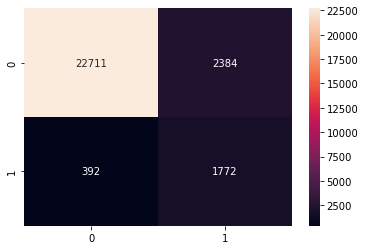

In [36]:
model_rf = RandomForestClassifier(bootstrap=True,criterion= 'gini',max_depth=8,max_features=1.0,max_samples= 0.75,n_estimators= 300)
model_rf.fit(x_train_new, y_train)
y_pred=model_rf.predict(x_test_new) 

print("Accuracy :--->>",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pred),label=["Negative", "Positive"],annot=True,fmt="1.0f")



import pickle
pickle.dump(model_rf,open('model.pkl','wb'))

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍PCA Visualization</p>

No handles with labels found to put in legend.


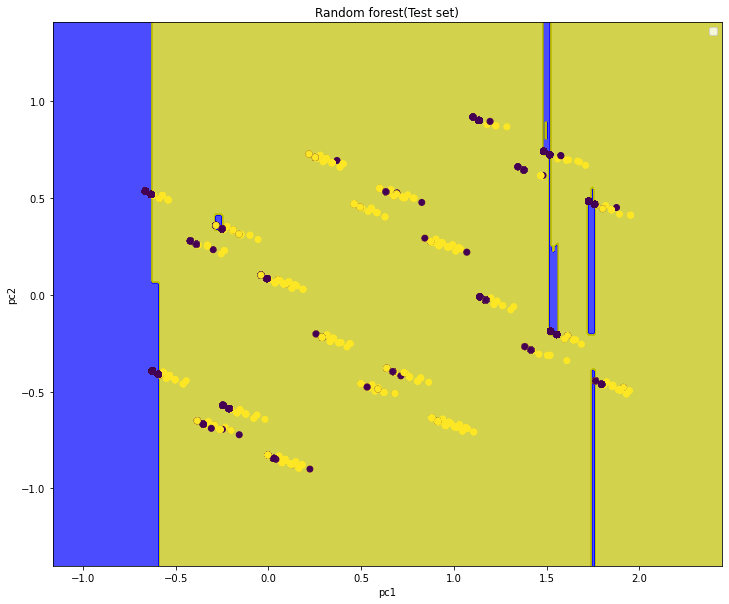

In [39]:
# Visualising the Test set results
plt.figure(figsize=(12,10))
from matplotlib.colors import ListedColormap
X_set, y_set = x_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-0.5,stop= X_set[:, 0].max()+0.5,step = 0.01),
                     np.arange(start = X_set[:, 1].min()-0.5 ,stop = X_set[:, 1].max()+0.5,step = 0.01))
plt.contourf(X1, X2, model_rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.70, cmap = ListedColormap(('blue', 'y')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(x_test_new[:,0],x_test_new[:,1],c=y_test)
                
plt.title('Random forest(Test set)')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

Text(0, 0.5, 'Second Principal Component')

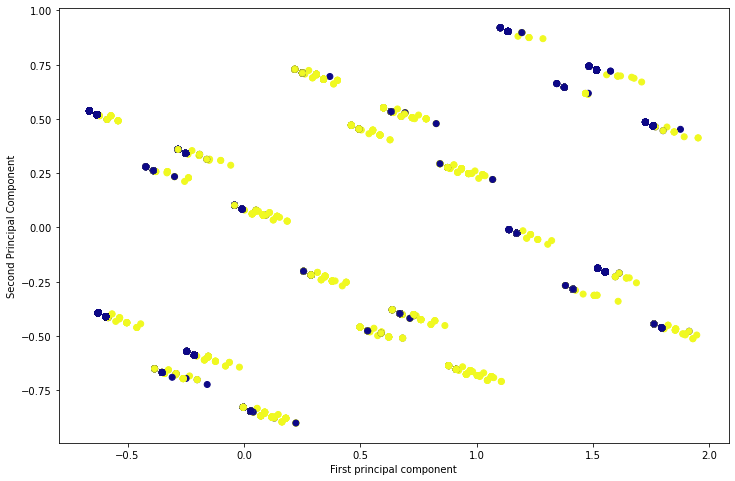

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(x_test_new[:,0],x_test_new[:,1],c=y_test,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')